# Project: Wrangling and Analyze Data

#### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#packages">Packages Setup</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing data</a></li>
<li><a href="#clean">Cleaning data</a></li>
<li><a href="#store">Storing data</a></li>
<li><a href="#analyze">Analyzing, and visualizing data</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This twitter dataset (extracted from [Twitter](https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive)) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rate), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

We will specifically gather 3 datasets for WeRateDogs tweets on dog ratings. We will then wrangles and get some insights on them.
1. WeRateDogs Twitter archive data (twitter_archive_enhanced.csv).
2. Tweet image prediction (image_predictions.tsv).
3. Programmatically query additional data via the Twitter API (tweet_json.txt).

<a id='packages'></a>
## Packages Setup
In the cells below, we install and gather **all** the packages required for this project and load them in the notebook. 

In [1]:
# Set up import statements for all of the packages that I used
import pandas as pd
import numpy as np
import seaborn as sns
import collections
from datetime import datetime
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
import csv
from timeit import default_timer as timer
from functools import reduce
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install pandas
# !pip install numpy
# !pip install --upgrade seaborn
# !pip install datetime
# !pip install matplotlib
# !pip install --upgrade tweepy

<a id='gather'></a>

## Data Gathering
In the cells below, we gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Here we directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and load the data into our `archive_df` dataframe.

In [3]:
 # Read the data directly into a Pandas DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

# Get the shape of the dataset
archive_df.shape

(2356, 17)

2. Next we use the Requests library to download the tweet image prediction (image_predictions.tsv) and load it into `image_df` dataframe.

In [4]:
# Using requests to get for the data
image_predictions="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [5]:
r = requests.get(image_predictions)

r.status_code

200

In [6]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [7]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(r.content)

In [8]:
# Read the data into a Pandas DataFrame
image_df= pd.read_csv("image_predictions.tsv", sep='\t')

# Get the shape of the dataset
image_df.shape

(2075, 12)

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt).

In [9]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = '*************************'
# consumer_secret = '*********************************************'
# access_token = '********************************************'
# access_secret = '***********************************'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

Let's Query Twitter's API for JSON data for each tweet ID in the Twitter archive and have each tweet's returned JSON as a new line in a .txt file and then we load the resultant json file into `data` dataframe.

In [10]:
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = arch_df.tweet_id.values
# len(tweet_ids)

In [11]:
# count = 0
# fails_dict = {}
# start = timer()
# with open('tweet-json', 'w') as outfile:
#     # This loop will likely take some time to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [12]:
with open('tweet-json','r') as f:
     data = pd.DataFrame([json.loads(l) for l in f.readlines()])
print(data)

     contributors coordinates                      created_at  \
0            None        None  Tue Aug 01 16:23:56 +0000 2017   
1            None        None  Tue Aug 01 00:17:27 +0000 2017   
2            None        None  Mon Jul 31 00:18:03 +0000 2017   
3            None        None  Sun Jul 30 15:58:51 +0000 2017   
4            None        None  Sat Jul 29 16:00:24 +0000 2017   
5            None        None  Sat Jul 29 00:08:17 +0000 2017   
6            None        None  Fri Jul 28 16:27:12 +0000 2017   
7            None        None  Fri Jul 28 00:22:40 +0000 2017   
8            None        None  Thu Jul 27 16:25:51 +0000 2017   
9            None        None  Wed Jul 26 15:59:51 +0000 2017   
10           None        None  Wed Jul 26 00:31:25 +0000 2017   
11           None        None  Tue Jul 25 16:11:53 +0000 2017   
12           None        None  Tue Jul 25 01:55:32 +0000 2017   
13           None        None  Tue Jul 25 00:10:02 +0000 2017   
14           None        

In [13]:
data.shape

(2327, 32)

<a id='assess'></a>

## Assessing Data
Here, we are working with 3 datasets;
* *archive_df*
* *image_df*
* *data*

We can now go ahead and access this data for quality and tidiness issues that simply clean and organize this issues.

We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. We have successfully selected those that are dog ratings but there are still some retweets in our dataset.

Assessing and cleaning the entire dataset completely would require a lot of time, so for this project we will just assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

**Note:**
* We will not clean rating values where rating numerators are greater than the denominators. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

* Images prediction of the tweets beyond August 1st, 2017 is not available so tweets outside this period won't be gathered as we don't have the required algorithm for this.

`archive_df` Table: Viewing the data in the dataframe under their corresponding header, we have that there are 2356 rows and 17 columns entries

In [14]:
#This shows the table for the `archive_df` and values in each column
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Issues with the `archive_df` are explored in the next cells below:

In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384...,11,10,Aiden,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
412,822975315408461824,NaN,NaN,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,None,None,None,None


In [17]:
# This helps us view the index number and label for each column and understand the values i each column

for i, v in enumerate(archive_df.columns):
    print(i, v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


In [18]:
# We see here that the rating denominators varied above and below the value, 10

archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
#This shows the number of unique values in each column
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

From the above, we see that doggo, floofer, pupper and puppo has just two unique values but their data type is *String*. We also see that though names have no null data, there are just 957 unique names of the 2355 values. We see retweets which we do not require for this investigation and there are just 4 device sources. Let's investigate these further.

In [20]:
#This shows the value count for each unique values in the `doggo` column
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
#This shows the value count for each unique values in the `floofer` column
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
#This shows the value count for each unique values in the `pupper` column
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
#This shows the value count for each unique values in the `puppo` column
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
#This shows the value count for each unique values in the `name` column
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Daisy         7
Bailey        7
Toby          7
Bella         6
Scout         6
Rusty         6
Stanley       6
Oscar         6
Jax           6
Koda          6
Milo          6
Leo           6
Jack          6
Dave          6
Oakley        5
           ... 
Ralphson      1
Harry         1
Champ         1
Storkson      1
Jersey        1
Kial          1
Iroh          1
Skye          1
Ember         1
Tiger         1
Andru         1
Barney        1
Blanket       1
Hamrick       1
Stella        1
Sundance      1
Emma          1
Pavlov        1
Remus         1
Tycho         1
Chesney       1
Jeremy        1
Shikha        1
Al            1
William       1
Florence      1
Grey          1
Amber         1
Gin           1
Gordon        1
Name: name, Length: 957,

In [25]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
archive_df.duplicated().sum()

0

In [27]:
# We will now like to inspect the data set for nulls and duplicates

archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
archive_df.rating_numerator.max()

1776

In [30]:
archive_df.rating_denominator.max()

170

In [31]:
with pd.option_context('max_colwidth', 200):
    display(archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


We see above that some numerator ratings were actually decimals but have extracted as integers of just their decimal values. They are few, we can manually fix this

`image_df` table: Viewing the data in the dataframe under their corresponding header, we have that there are 2075 rows and 12 columns entries

In [32]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Issues with the `image_df` are explored in the next cells below:

In [33]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_df.jpg_url.duplicated().sum()

66

In [35]:
# We will now like to inspect the data set for nulls and duplicates

image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [36]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False


In [37]:
#This shows the number of unique values in each column
image_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [38]:
#This shows the value count for each unique values in the `p1_dog` column
image_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [39]:
#This shows the value count for each unique values in the `p1_dog` column
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [40]:
#This shows the value count for each unique values in the `p2_dog` column
image_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [41]:
image_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
malinois                           20
Samoyed                            20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [42]:
#This shows the value count for each unique values in the `p3_dog` column
image_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
image_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [44]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

`data` table: Viewing the data in the dataframe under their corresponding header, we have that there are 2075 rows and 12 columns entries

In [46]:
data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33695,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,6969,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29218,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5272,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21974,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3464,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36779,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,7191,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35181,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,7715,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",17744,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,2585,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10326,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,1646,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56648,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,15678,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",24419,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,3604,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",27841,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,6067,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2327 non-null object
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null object
id                               2327 non-null int64
id_str                           2327 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [48]:
# This helps us view the index number and label for each column and understand the values i each column

for i, v in enumerate(data.columns):
    print(i, v)

0 contributors
1 coordinates
2 created_at
3 display_text_range
4 entities
5 extended_entities
6 favorite_count
7 favorited
8 full_text
9 geo
10 id
11 id_str
12 in_reply_to_screen_name
13 in_reply_to_status_id
14 in_reply_to_status_id_str
15 in_reply_to_user_id
16 in_reply_to_user_id_str
17 is_quote_status
18 lang
19 place
20 possibly_sensitive
21 possibly_sensitive_appealable
22 quoted_status
23 quoted_status_id
24 quoted_status_id_str
25 quoted_status_permalink
26 retweet_count
27 retweeted
28 retweeted_status
29 source
30 truncated
31 user


In [49]:
data.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1253,None,None,Sun Mar 13 00:24:26 +0000 2016,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708810903379005440, 'id_str'...",15201,False,This is Mister. He's a wonderful father to his...,None,...,NaN,NaN,NaN,NaN,6240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
636,None,None,Thu Oct 27 23:17:38 +0000 2016,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Maddie. She gets some w...,None,...,NaN,NaN,NaN,NaN,3544,False,{'created_at': 'Sat Jun 25 17:31:25 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1202,None,None,Fri Mar 25 17:03:49 +0000 2016,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 713411058820460546, 'id_str'...",4089,False,Here we see an extremely rare Bearded Floofmal...,None,...,NaN,NaN,NaN,NaN,1184,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
70,None,None,Sun Jun 25 00:45:22 +0000 2017,"[0, 126]","{'hashtags': [{'text': 'PrideMonthPuppo', 'ind...","{'media': [{'id': 878776084946448384, 'id_str'...",17080,False,This is Snoopy. He's a proud #PrideMonthPuppo....,None,...,NaN,NaN,NaN,NaN,3418,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1315,None,None,Tue Mar 01 20:11:59 +0000 2016,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 704761116849774592, 'id_str'...",6119,False,This pupper killed this great white in an epic...,None,...,NaN,NaN,NaN,NaN,2617,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [50]:
all_columns = pd.Series(list(archive_df) + list(image_df) + list(data))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

### Quality issues

For `archive_df dataframe`:

1. Remove all columns related to retweet as they are not necessary for this investigation

2. It has 20 invalid data entries in `rating_denominator` column with rating denominator larger than 10 

3. Correct the decimal values in `rating_numerator` column

4. The table has unrealistic values (discriminants) in the `name` column indicated as ***a, an, the***. These account for over 70 entries out of the remaining (957 -745) 223 unique values for name. The must have been read as names in error.

5. `timestamp` column on the `archive_df` table has a data type string instead of date-time  



For `data` dataframe

6. Remove all columns related to retweet as they are not necessary for this investigation

7. `data` Consistency issues with `tweet_id` as `id` and `timestamp` as `created_at` column. Also `created_at` column on the `data` table should be of data type datetime not string

8. There are no entries in the `contributors`, `co-ordinators`, `geo` and `place` columns

The `image_df` dataframe:

9. Drop 66 jpg_url duplicated

10. This has images that are not dogs. These are indicated under columns p1_dog, p1, p2_dog, p2, p3_dog, p3. Data that indicates False in all 3 needs to be removed


### Tidiness issues

1. Data in the following columns should belong to just one column; *doggo, floofer, pupper, puppo*. So we will merge and drop them.

2. The three data frames should be one, we need to merge them.

The `merged` dataframe
* Merge dataset on using `tweet_id` making sure `tweet_id` is of the same name and datatype in the three dataframes.
* Remove duplicate entries

Delete unnecessary columns for this investigation from the dataset.

<a id='clean'></a>

## Cleaning Data
In this section, we will clean **all** of the issues documented while assessing. 

**Note:** The aim is to produce a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [51]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_clean = image_df.copy()
data_clean = data.copy()

### Quality Issues for `archive_df`

In [52]:
#DEFINE 1. Remove all rows and columns related to retweet as they are not necessary for this investigation from archive_clean and data_clean

#Viewing the dataset to see and drop irrelevant rows and columns for this investigation
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [53]:
#CODE: Dropping Retweet Rows

archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


In [54]:
#CODE: DROPPING RETWEET COLUMNS
archive_clean=archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#TEST
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [55]:
#Define 2. It has 20 invalid data entries in `rating_denominator` column with rating denominator larger than 10 . 
#Replace values greater or lesser than 10 in `rating_denominator` column with 10 and Correct numerators with decimals

#CODE: Replace values greater or lesser than 10 in rating_denominator column with 10

archive_clean.rating_denominator.replace(to_replace=[0, 2, 7, 11, 15, 16, 20, 40, 50, 70, 80, 90, 110, 120, 130, 150, 170], value=10, inplace=True, limit=None, regex=False, method='pad')

In [56]:
# TEST: This checks if the only entry for `rating_denominator` is now 10
collections.Counter(archive_clean['rating_denominator']!= 10), archive_clean.rating_denominator.value_counts()

(Counter({False: 2175}), 10    2175
 Name: rating_denominator, dtype: int64)

In [57]:
#Define 3. Correct the decimal values in `rating_numerator` column. Manually Correct numerators with decimals

#CODE: Update the fractional numerators to the nearest greatest integer
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id == 832215909146226688), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11


In [58]:
# TEST: This checks if the only entry for `rating_numerator` is now the greatest integer
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",14,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,10,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11,10


In [59]:
# Define 4. The table has unrealistic values (discriminants) in the `name` column indicated as ***a, an, the***. These account for over 70 entries out of the remaining (957 -745) 223 unique values for name. The must have been read as names in error.
#See the issue
names_df = archive_clean.copy()
names_df[names_df.name.str.match('[a-z]+')].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [60]:
#CODE: We write a function to check that all the unrealistic values (discriminants) 
# in the name column indicated as "a", "an", "the", "quite", "None", has been taken care of. 


article_list = ['the', 'None', 'none', 'quite', 'such', 'a', 'quite', 'not', 'one', 'O', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']

for value in article_list: 
    archive_clean.name.replace(to_replace=value, value= 'No name', inplace=True)
    
#TEST
all_names=list(archive_clean.name.unique())
# Note, we added a valid name "Walter" to comfirm that our function works fine 
article_list.append("Walter")

for value in article_list:
    if value in all_names:
        print("Value is in name")
    else:
        print("Value not in name")
        


Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value not in name
Value is in name


In [61]:
archive_clean.name.value_counts()

No name     785
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Stanley       6
Oscar         6
Jax           6
Bailey        6
Koda          6
Bella         6
Bo            6
Dave          5
Milo          5
Leo           5
Chester       5
Bentley       5
Scout         5
Louis         5
Buddy         5
Rusty         5
Derek         4
Chip          4
           ... 
Clarkus       1
Georgie       1
Karma         1
Rey           1
Amber         1
Florence      1
Pancake       1
Al            1
Duddles       1
Daniel        1
Cali          1
Boots         1
Kyro          1
Tiger         1
Andru         1
Lilly         1
Barney        1
Blanket       1
Hamrick       1
Stella        1
Sundance      1
Emma          1
Pavlov        1
Ember         1
Kenny         1
Remus         1
Chesney       1
Jeremy        1
Shikha        1
Gordon        1
Name: name, Length: 930,

In [62]:
# Define 5. `timestamp` column on the `archive_df` table has a data type string instead of datetime 

#CODE: Convert the timestamp column data type from String to datetime using pd.to_datetime
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])

In [63]:
#extract year, month and day to new columns
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day

In [64]:
#TEST: This checks for successful conversion of data type for timestamp, doggo, floofer, pupper, puppo columns from String to Boolean using astype

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
year                     2175 non-null int64
month                    2175 non-null int64
day                      2175 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(8)
memory usage: 305.9+ KB


### Tidiness Issues for `archive_df`

In [65]:
# First replace None in stage columns with empty string as follows.
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
archive_clean['dog_class'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.
archive_clean.loc[archive_clean.dog_class == 'doggopupper', 'dog_class'] = 'doggo,pupper' 
archive_clean.loc[archive_clean.dog_class == 'doggopuppo', 'dog_class'] = 'doggo, puppo' 
archive_clean.loc[archive_clean.dog_class == 'flooferpuppo', 'dog_class'] = 'floofer,puppo' 
archive_clean.loc[archive_clean.dog_class == 'flooferpupper', 'dog_class'] = 'floofer,pupper'
archive_clean.loc[archive_clean.dog_class == 'pupperpuppo', 'dog_class'] = 'pupper,puppo' 
archive_clean.loc[archive_clean.dog_class == 'doggofloofer', 'dog_class'] = 'doggo,floofer'

In [66]:
list(archive_clean.dog_class.unique())

['',
 'doggo',
 'puppo',
 'pupper',
 'floofer',
 'doggo, puppo',
 'doggo,floofer',
 'doggo,pupper']

In [67]:
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], 1)

#TEST: print list of image_clean columns
print(list(archive_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'year', 'month', 'day', 'dog_class']


In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
year                     2175 non-null int64
month                    2175 non-null int64
day                      2175 non-null int64
dog_class                2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 254.9+ KB


### Quality Issues for `data_clean`

In [69]:
#DEFINE 6. Remove all rows and columns related to retweet as they are not necessary for this investigation from archive_clean and data_clean

#Viewing the dataset to see and drop irrelevant rows and columns for this investigation
list(data_clean)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [70]:
#CODE: Dropping Retweet Rows
data_clean = data_clean[pd.isnull(data_clean['retweeted_status'])]

#TEST
print(sum(data_clean.retweeted_status.value_counts()))

0


In [71]:
#CODE: DROPPING RETWEET COLUMNS
data_clean= data_clean.drop(['retweeted', 'retweeted_status'], axis=1)

#TEST
list(data_clean)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'source',
 'truncated',
 'user']

In [72]:
# DEFINE: Data Consistency issues with `tweet_id` as `id` and `timestamp` as `created_at` column. 
# Also `created_at` column on the `data` table should be of data type datetime not string

In [73]:
data_clean.rename(columns={'id': 'tweet_id', 'created_at':'timestamp'}, inplace=True)

In [74]:
data_clean['timestamp']= pd.to_datetime(data_clean['timestamp'])

In [75]:
#TEST
list(data_clean)

['contributors',
 'coordinates',
 'timestamp',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'tweet_id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'source',
 'truncated',
 'user']

#### Code

In [76]:
#DEFINE 8. There are no entries in the `contributors`, `co-ordinators`, `geo` and `place` columns
#Finally drop ALL unnecessary columns and timestamp column for this investigation

#CODE: DROPPING RETWEET COLUMNS
data_clean= data_clean.drop(['contributors', 'id_str', 'lang', 'possibly_sensitive', 'possibly_sensitive_appealable',
                             'coordinates', 'geo', 'place', 'quoted_status','quoted_status_id', 'quoted_status_id_str', 
                             'quoted_status_permalink', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'source',
                             'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
                             'is_quote_status', 'entities', 'extended_entities', 'user', 'timestamp'], axis=1)

#TEST
list(data_clean)

['display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'tweet_id',
 'retweet_count',
 'truncated']

In [77]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 7 columns):
display_text_range    2167 non-null object
favorite_count        2167 non-null int64
favorited             2167 non-null bool
full_text             2167 non-null object
tweet_id              2167 non-null int64
retweet_count         2167 non-null int64
truncated             2167 non-null bool
dtypes: bool(2), int64(3), object(2)
memory usage: 105.8+ KB


### Quality Issue for `image_df`

In [78]:
#DEFINE 9. Drop 66 jpg_url duplicated

#CODE: Delete duplicated jpg_url
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [79]:
#TEST: This checks if there are still duplicates in the dataset
image_clean['jpg_url'].duplicated().sum()

0

In [80]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [81]:
#Define: Some images do not represent tweets of dogs_type.
    #These are indicated under columns p1_dog, p1, p2_dog, p2, p3_dog, p3. 
    #Data that indicates False in all 3 needs to be removed
    
#CODE: the first true image prediction (p1, p2 or p3) will be store in these lists
dog_type = []
conf_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' image prediction
def image(image_clean):
    if image_clean['p1_dog'] == True:
        dog_type.append(image_clean['p1'])
        conf_list.append(image_clean['p1_conf'])
    elif image_clean['p2_dog'] == True:
        dog_type.append(image_clean['p2'])
        conf_list.append(image_clean['p2_conf'])
    elif image_clean['p3_dog'] == True:
        dog_type.append(image_clean['p3'])
        conf_list.append(image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        conf_list.append('Error')

#series objects having index the image_clean column.        
image_clean.apply(image, axis=1)

#create new columns
image_clean['dog_type'] = dog_type
image_clean['conf_list'] = conf_list

In [82]:
#drop rows that has prediction_list 'error'
image_clean = image_clean[image_clean['dog_type'] != 'Error']

In [83]:
#Delete unnecessary columns
image_clean = image_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog','p2', 
                                'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#TEST: print list of image_clean columns
print(list(image_clean))

['tweet_id', 'jpg_url', 'dog_type', 'conf_list']


In [84]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
dog_type     1691 non-null object
conf_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


### Tidiness Issue: Merge datasets

In [85]:
#DEFINE: The 3 dataframes are actually the same and should be merged into one using the tweet_id column as primary key

#CODE: Merge the 3 dataframes
data_frames=[archive_clean, image_clean, data_clean]

merge = reduce(lambda  left, right: pd.merge(left,right,on=['tweet_id'],
                                            how='left'), data_frames)

In [86]:
merge

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,dog_class,jpg_url,dog_type,conf_list,display_text_range,favorite_count,favorited,full_text,retweet_count,truncated
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,,NaN,NaN,NaN,"[0, 85]",33695.0,False,This is Phineas. He's a mystical boy. Only eve...,6969.0,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,"[0, 138]",29218.0,False,This is Tilly. She's just checking pup on you....,5272.0,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,"[0, 121]",21974.0,False,This is Archie. He is a rare Norwegian Pouncin...,3464.0,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,"[0, 79]",36779.0,False,This is Darla. She commenced a snooze mid meal...,7191.0,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,"[0, 138]",35181.0,False,This is Franklin. He would like you to stop ca...,7715.0,False
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,No name,...,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,"[0, 138]",17744.0,False,Here we have a majestic great white breaching ...,2585.0,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,"[0, 140]",10326.0,False,Meet Jax. He enjoys ice cream so much he gets ...,1646.0,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,No name,...,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,"[0, 118]",56648.0,False,When you watch your owner call another dog a g...,15678.0,False
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,"[0, 122]",24419.0,False,This is Zoey. She doesn't want to be one of th...,3604.0,False
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,"[0, 133]",27841.0,False,This is Cassie. She is a college pup. Studying...,6067.0,False


In [87]:
merge.isnull().sum()

tweet_id                    0
in_reply_to_status_id    2097
in_reply_to_user_id      2097
timestamp                   0
source                      0
text                        0
expanded_urls              58
rating_numerator            0
rating_denominator          0
name                        0
year                        0
month                       0
day                         0
dog_class                   0
jpg_url                   549
dog_type                  549
conf_list                 549
display_text_range          8
favorite_count              8
favorited                   8
full_text                   8
retweet_count               8
truncated                   8
dtype: int64

In [88]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
year                     2175 non-null int64
month                    2175 non-null int64
day                      2175 non-null int64
dog_class                2175 non-null object
jpg_url                  1626 non-null object
dog_type                 1626 non-null object
conf_list                1626 non-null object
display_text_range       2167 non-null object
favorite_count           2167 non-null float64
favorited         

<a id='store'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [89]:
merge

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,dog_class,jpg_url,dog_type,conf_list,display_text_range,favorite_count,favorited,full_text,retweet_count,truncated
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,,NaN,NaN,NaN,"[0, 85]",33695.0,False,This is Phineas. He's a mystical boy. Only eve...,6969.0,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,"[0, 138]",29218.0,False,This is Tilly. She's just checking pup on you....,5272.0,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,"[0, 121]",21974.0,False,This is Archie. He is a rare Norwegian Pouncin...,3464.0,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,"[0, 79]",36779.0,False,This is Darla. She commenced a snooze mid meal...,7191.0,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,"[0, 138]",35181.0,False,This is Franklin. He would like you to stop ca...,7715.0,False
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,No name,...,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,"[0, 138]",17744.0,False,Here we have a majestic great white breaching ...,2585.0,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,"[0, 140]",10326.0,False,Meet Jax. He enjoys ice cream so much he gets ...,1646.0,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,No name,...,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,"[0, 118]",56648.0,False,When you watch your owner call another dog a g...,15678.0,False
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,"[0, 122]",24419.0,False,This is Zoey. She doesn't want to be one of th...,3604.0,False
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,"[0, 133]",27841.0,False,This is Cassie. She is a college pup. Studying...,6067.0,False


In [90]:
pd.DataFrame.to_csv(merge, 'twitter_archive_master.csv', sep=',', na_rep='.', index=False)

In [91]:
# Read the data directly into a Pandas DataFrame
    
master_df = pd.read_csv('twitter_archive_master.csv', sep=',')

In [92]:
# View
master_df 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,dog_class,jpg_url,dog_type,conf_list,display_text_range,favorite_count,favorited,full_text,retweet_count,truncated
0,892420643555336193,.,.,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,NaN,.,.,.,"[0, 85]",33695.0,False,This is Phineas. He's a mystical boy. Only eve...,6969.0,False
1,892177421306343426,.,.,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,"[0, 138]",29218.0,False,This is Tilly. She's just checking pup on you....,5272.0,False
2,891815181378084864,.,.,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,"[0, 121]",21974.0,False,This is Archie. He is a rare Norwegian Pouncin...,3464.0,False
3,891689557279858688,.,.,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,"[0, 79]",36779.0,False,This is Darla. She commenced a snooze mid meal...,7191.0,False
4,891327558926688256,.,.,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,"[0, 138]",35181.0,False,This is Franklin. He would like you to stop ca...,7715.0,False
5,891087950875897856,.,.,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,No name,...,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,"[0, 138]",17744.0,False,Here we have a majestic great white breaching ...,2585.0,False
6,890971913173991426,.,.,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.34170300000000003,"[0, 140]",10326.0,False,Meet Jax. He enjoys ice cream so much he gets ...,1646.0,False
7,890729181411237888,.,.,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,No name,...,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,"[0, 118]",56648.0,False,When you watch your owner call another dog a g...,15678.0,False
8,890609185150312448,.,.,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,"[0, 122]",24419.0,False,This is Zoey. She doesn't want to be one of th...,3604.0,False
9,890240255349198849,.,.,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,"[0, 133]",27841.0,False,This is Cassie. She is a college pup. Studying...,6067.0,False


In [93]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
year                     2175 non-null int64
month                    2175 non-null int64
day                      2175 non-null int64
dog_class                2175 non-null object
jpg_url                  1626 non-null object
dog_type                 1626 non-null object
conf_list                1626 non-null object
display_text_range       2167 non-null object
favorite_count           2167 non-null float64
favorited         

In [94]:
# Get information about the dataset

master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
year                     2175 non-null int64
month                    2175 non-null int64
day                      2175 non-null int64
dog_class                344 non-null object
jpg_url                  2175 non-null object
dog_type                 2175 non-null object
conf_list                2175 non-null object
display_text_range       2175 non-null object
favorite_count           2175 non-null object
favorited                2

<a id='analyze'></a>

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. We produce over **three (3) insights and some visualizations.**

### Insights:
We see the following upon investigations:

1. Most Dogs were rated between 9 and 14.

2. The dogs with the highest rating were of class "puppo" and type 'golden_retriever'. 

3. Also, Puppers form over 50% of the recognized dog types.

4. Golden retriever is the most common dog in this dataset.

5. Japanese_spaniel has the lowest average rating while soft-coated_wheaten_terrier has the highest average rating.

6. dog_types with low number of ratings show a high variety of mean ratings.


In [95]:
#Here we describe the data set. This gives us insights on the ratings and tweet date spread. The numerator ratings is centered around 9-14.

master_df.describe()

,tweet_id,rating_numerator,rating_denominator,year,month,day
count,2.175000e+03,2175.000000,2175.0,2175.000000,2175.000000,2175.000000
mean,7.371205e+17,13.177471,10.0,2015.867126,7.028046,15.954483
std,6.748668e+16,47.705077,0.0,0.694504,4.125297,8.935383
min,6.660209e+17,0.000000,10.0,2015.000000,1.000000,1.000000
25%,6.768432e+17,10.000000,10.0,2015.000000,3.000000,8.000000
50%,7.098528e+17,11.000000,10.0,2016.000000,7.000000,16.000000
75%,7.894226e+17,12.000000,10.0,2016.000000,11.000000,24.000000
max,8.924206e+17,1776.000000,10.0,2017.000000,12.000000,31.000000


Most Dogs were rated between 9 and 14 with a mean score of 13

In [96]:
# We want to see how many of each dog types were tweeted over the period being investigated. golden_retriever was most tweeted.

master_df['dog_type'].value_counts()

.                                 549
golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          20
Shih-Tzu                           20
Siberian_husky                     20
Rottweiler                         19
Maltese_dog                        19
Cardigan                           19
beagle                             19
Shetland_sheepdog                  19
kuvasz                             18
Lakeland_ter

In [97]:
dog_type_mean_df = master_df.groupby('dog_type').mean()
dog_type_mean_df.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day
dog_type,,,,,,
.,7.332270e+17,18.428051,10.0,2015.826958,7.15847,15.890710
Afghan_hound,8.095999e+17,8.000000,10.0,2016.500000,6.00000,16.000000
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.75000,15.916667
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.25000,15.000000
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.50000,18.500000


In [98]:
#We can see that Japanese_spaniel got averagely the lowest rating while soft-coated_wheaten_terrier got the average highest

dog_type_sorted_df = dog_type_mean_df['rating_numerator'].sort_values()

dog_type_sorted_df

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Maltese_dog                     9.315789
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Saint_Bernard                   9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
English_setter                  9.714286
Scottish_deerhound              9.750000
Rhodesian_ridgeback             9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniature_pinscher              9.916667
groenen

In [99]:
# Among the classified dogs, puppo had the heighest average rating

dog_class_mean_df = master_df.groupby('dog_class').mean()
dog_class_mean_df.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day
dog_class,,,,,,
doggo,7.945997e+17,11.853333,10.0,2016.400000,5.893333,14.133333
"doggo, puppo",8.558515e+17,13.000000,10.0,2017.000000,4.000000,22.000000
"doggo,floofer",8.540102e+17,11.000000,10.0,2017.000000,4.000000,17.000000
"doggo,pupper",7.781766e+17,11.100000,10.0,2016.100000,7.900000,17.500000
floofer,7.558218e+17,11.888889,10.0,2016.111111,5.777778,16.666667


In [100]:
dog_class_sorted_df = dog_class_mean_df['rating_numerator'].sort_values()

dog_class_sorted_df

dog_class
pupper           10.736607
doggo,floofer    11.000000
doggo,pupper     11.100000
doggo            11.853333
floofer          11.888889
puppo            12.041667
doggo, puppo     13.000000
Name: rating_numerator, dtype: float64

In [101]:
# Lets get a glimpse of the 'golden_retrievers' in our dataset

master_df[master_df['dog_type'] == 'golden_retriever']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,dog_class,jpg_url,dog_type,conf_list,display_text_range,favorite_count,favorited,full_text,retweet_count,truncated
14,889531135344209921,.,.,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,...,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,"[0, 118]",13312.0,False,This is Stuart. He's sporting his favorite fan...,1873.0,False
16,888917238123831296,.,.,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,...,NaN,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719,"[0, 86]",25529.0,False,This is Jim. He found a fren. Taught him how t...,3742.0,False
17,888804989199671297,.,.,2017-07-22 16:56:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,...,NaN,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,golden_retriever,0.46976,"[0, 128]",22385.0,False,This is Zeke. He has a new stick. Very proud o...,3512.0,False
42,883482846933004288,.,.,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,14,10,Bella,...,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,"[0, 112]",40040.0,False,This is Bella. She hopes her smile made you sm...,8222.0,False
44,883117836046086144,.,.,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,No name,...,NaN,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,golden_retriever,0.949562,"[0, 111]",32383.0,False,Please only send dogs. We don't rate mechanics...,5512.0,False
48,882268110199369728,.,.,2017-07-04 16:01:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfy. You're witnessing his first wate...,https://twitter.com/dog_rates/status/882268110...,13,10,Alfy,...,NaN,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,golden_retriever,0.762211,"[0, 114]",39029.0,False,This is Alfy. You're witnessing his first wate...,9582.0,False
49,882045870035918850,.,.,2017-07-04 01:18:17,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,13,10,Koko,...,NaN,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,golden_retriever,0.00694063,"[0, 133]",25624.0,False,"This is Koko. Her owner, inspired by Barney, r...",4066.0,False
57,880465832366813184,.,.,2017-06-29 16:39:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,...,NaN,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,golden_retriever,0.913255,"[0, 114]",24926.0,False,This is Bella. She had her first beach experie...,5192.0,False
77,876484053909872640,.,.,2017-06-18 16:57:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,...,NaN,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,"[0, 127]",16508.0,False,This is Benedict. He wants to thank you for th...,1989.0,False
103,870374049280663552,.,.,2017-06-01 20:18:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,...,NaN,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001,"[0, 139]",73

In [102]:
# Lets get a glimpse of the 'puppo' in our dataset

master_df[master_df['dog_class'] == 'puppo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,dog_class,jpg_url,dog_type,conf_list,display_text_range,favorite_count,favorited,full_text,retweet_count,truncated
12,889665388333682689,.,.,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,No name,...,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,"[0, 106]",41871.0,False,Here's a puppo that seems to be on the fence a...,8303.0,False
14,889531135344209921,.,.,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,...,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,"[0, 118]",13312.0,False,This is Stuart. He's sporting his favorite fan...,1873.0,False
67,878776093423087618,.,.,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,...,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Italian_greyhound,0.734684,"[0, 126]",17080.0,False,This is Snoopy. He's a proud #PrideMonthPuppo....,3418.0,False
86,874012996292530176,.,.,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,...,puppo,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,Cardigan,0.806674,"[0, 139]",30019.0,False,This is Sebastian. He can't see all the colors...,8551.0,False
115,867421006826221569,.,.,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,...,puppo,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,Eskimo_dog,0.6164569999999999,"[0, 133]",14293.0,False,This is Shikha. She just watched you drop a sk...,2109.0,False
146,859607811541651456,.,.,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,No name,...,puppo,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,golden_retriever,0.8955290000000001,"[0, 136]",16789.0,False,Sorry for the lack of posts today. I came home...,1359.0,False
334,825535076884762624,.,.,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,No name,...,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,"[0, 118]",53811.0,False,Here's a very loving and accepting puppo. Appe...,16300.0,False
336,825026590719483904,.,.,2017-01-27 17:04:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,...,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454,"[0, 140]",5889.0,False,Say hello to Pablo. He's one gorgeous puppo. A...,1165.0,False
348,822872901745569793,.,.,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,No name,...,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,"[0, 87]",123678.0,False,Here's a super supportive puppo participating ...,39748.0,False
366,819952236453363712,.,.,2017-01-13 17:00:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,...,puppo,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,American_Staff

In [103]:
# This gives us insights of how many times each dog_type got rated. Golden_retriever got rated 158 times with an average rating of 13.056962

df_dog_type_count = master_df.groupby('dog_type').rating_numerator.count()
df_dog_type_count

dog_type
.                                 549
Afghan_hound                        2
Airedale                           12
American_Staffordshire_terrier     16
Appenzeller                         2
Australian_terrier                  2
Bedlington_terrier                  6
Bernese_mountain_dog               11
Blenheim_spaniel                   10
Border_collie                      12
Border_terrier                      7
Boston_bull                        12
Bouvier_des_Flandres                1
Brabancon_griffon                   3
Brittany_spaniel                    8
Cardigan                           19
Chesapeake_Bay_retriever           31
Chihuahua                          87
Dandie_Dinmont                      7
Doberman                            9
English_setter                      7
English_springer                    9
EntleBucher                         1
Eskimo_dog                         22
French_bulldog                     30
German_shepherd                    21
Ger

In [104]:
dog_type_count = df_dog_type_count
dog_type_mean = dog_type_mean_df['rating_numerator']
dog_type_mean

dog_type
.                                 18.428051
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.413793
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher            

In [105]:
#Placing dog_type and mean rating side by side

dog_type_df = pd.DataFrame()
dog_type_df['dog_type_count'] = dog_type_count
dog_type_df['dog_type_mean'] = dog_type_mean
dog_type_df 

,dog_type_count,dog_type_mean
dog_type,,
.,549,18.428051
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000


### Visualization

Now to visualizations, we will be exploring some visuals for better insights, we will use some of what we already defined while exploring insights.

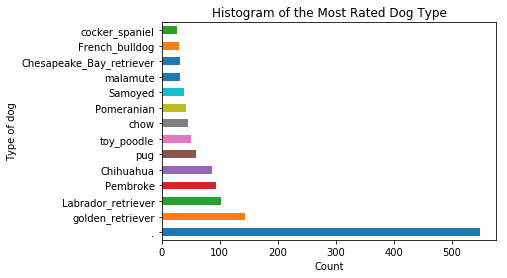

In [106]:
#We see that the most rated known dog_type is actually golden retriever, slightly above 150

dog_type_df = master_df.groupby('dog_type').filter(lambda x: 25 <=len(x));

dog_type_df['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png', bbox_inches='tight');

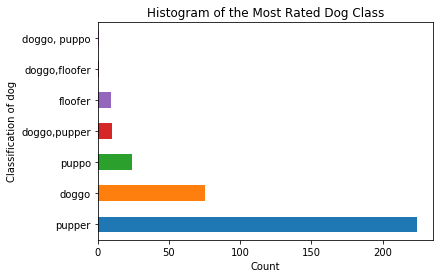

In [107]:
#This shows that the most rated known dog_class is the pupper, slightly above 150

dog_type_df = master_df.groupby('dog_class').filter(lambda x: len(x)<=500)

dog_type_df['dog_class'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Class')
plt.xlabel('Count')
plt.ylabel('Classification of dog')

fig = plt.gcf() 
fig.savefig('output1.png', bbox_inches='tight');

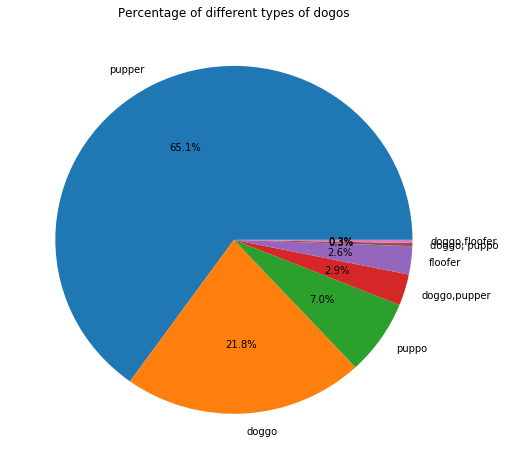

In [108]:
# Create a pie plot with the different percentages of dog classes
master_df.query('dog_class != "Unclassified"').dog_class.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8));
plt.title('Percentage of different types of dogos')
plt.ylabel('')
plt.show()


fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight');

In [109]:
# monthly_tweets = master_df.groupby('month_x').count().reset_index()
# monthly_tweets = monthly_tweets[['month_x', 'tweet_id']]
# monthly_tweets.head()
# monthly_tweets.sum()

master_df.timestamp = pd.to_datetime(master_df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = master_df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2175
dtype: int64

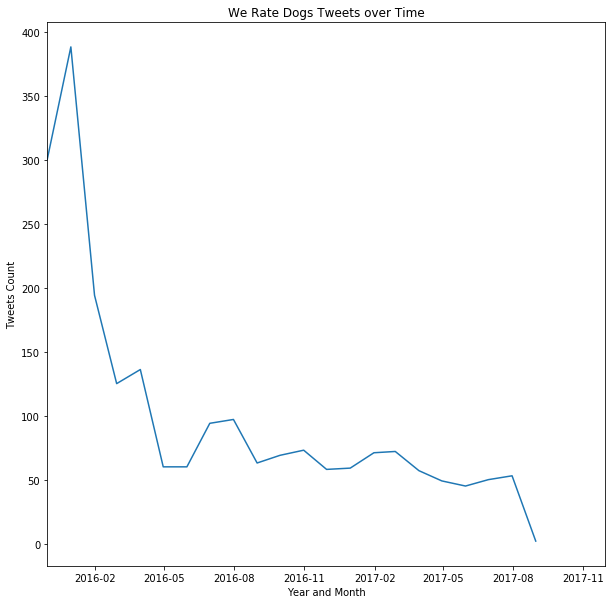

In [110]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
# plt.xlim([datetime.date(int(2015),int(11), int(30)), datetime.date(int(2017),int(11), int(30))]);
plt.xlim([datetime(2015,11,30).date(), datetime(2017,11,30).date()]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

fig = plt.gcf() 
fig.savefig('output3.png',bbox_inches='tight');

<a id='conclusions'></a>

## Conclusions

WerateDogs tweeted more in its early beginning than towards the end of 2017. They rated most Dogs were rated between 9 and 14 over 10 ofcourse, their inflated ratings pulled traction. The dogs with the highest rating were of class "puppo" and type 'golden_retriever'. Infact, Golden retriever is the most common dog in this dataset. Also, we see that Puppers form over 50% of the recognized dog types. Japanese_spaniel has the lowest average rating while soft-coated_wheaten_terrier has the highest average rating. dog_types with low number of ratings show a high variety of mean ratings.


In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0